In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))
import numpy as np
import pygritbx as pgt

In [2]:
# Unit vecotrs for reference frame
i = np.array([1, 0, 0])
j = np.array([0, 1, 0])
k = np.array([0, 0, 1])
referenceFrame = np.array([i, j, k])

In [3]:
# Material
gear_material = pgt.Material("Steel", sigma_u=1050, sigma_y=930, sigma_Dm1=0, HB=525)
A4_material = pgt.Material("34CrNiMo6", sigma_u=800, sigma_y=600, sigma_Dm1=400, HB=0)

In [4]:
# Input motor
input_motor = pgt.Motor(name="Input Motor", loc=500, power=33*1e3, n=1050/18.32*39/15, axis=-k)

In [5]:
# Locations
# Shaft A5
zG5 = 471.5 - 105.5
zG6 = 471.5 - 105.5
zA = 183.5 + 255
zB = 183.5
zOut = 31.5 + (62/2)

In [6]:
# Gears
# G5
G5 = pgt.Gear(name="G5", axis=k, loc=zG5, m_n=8, z=15, psi=15, phi_n=20, Q_v=6, FW=109, material=gear_material)
# G6
G6 = pgt.Gear(name="G6", axis=k, loc=zG6, m_n=8, z=39, psi=-15, phi_n=20, Q_v=6, FW=109, material=gear_material)

In [7]:
A = pgt.Support(name="A", type="Roller", bearingType="Cylindrical", catalogueName="NJ 217 ECP", d=85, D=150, B=28, 
                     C=190*1e3, C0=200*1e3, Pu=25*1e3, nr=4800, e=0.2, Y=0.6, kr=0.15, axis=k, loc=zA, arr="Single", 
                     catalogueType="Explorer")
B = pgt.Support(name="B", type="Pin", bearingType="Cylindrical", catalogueName="24020 CC/W33", catalogueType="Explorer", d=100,
                     D=150, B=50, C=296*1e3, C0=415*1e3, Pu=45.5*1e3, nr=2800, e=0.28, Y1=2.4, Y2=3.6, Y0=2.5, axis=k, 
                     loc=zB, arr="Double row")

In [8]:
# Output Component
output = pgt.Component(name="Output", material=None, axis=k)

In [9]:
# Gearbox Configuration
# Shaft A
Ap = pgt.Shaft(name="Ap", inputs=[input_motor], outputs=[G5], axis=k, material=None, sups=np.array([]), loc=[0, 0, 0])
# Mesh M1
M1 = pgt.GearMesh(name="M1", drivingGear=G5, drivenGear=G6, radiality=[i], type="External")
# Shaft A4
A4 = pgt.Shaft(name="A4", inputs=[G6], outputs=[output], axis=k, material=A4_material, sups=np.array([A, B]))

In [10]:
Ap.solve()

Checking torque equilibrium for Ap.
Ap does not mainatain a torque equilibrium.
Checking solvability for Ap.
Solving torque equilibrium for Ap.
Torque equilibrium for Ap is solved.
Checking torque equilibrium for G5.
G5 does not mainatain a torque equilibrium.
Checking solvability for G5.
Solving forces on G5 due to mesh M1.
Checking torque equilibrium for G5.
G5 mainatains a torque equilibrium.
Checking force equilibrium on Ap.
Ap does not maintain a force equilibrium.
Reaction forces on Ap won't be calculated.


In [11]:
G5.EFs[0].force

array([-12828.11256096,  34044.00706052,   9122.06419899])

In [12]:
G6.solve()

Checking torque equilibrium for G6.
Checking solvability for G6.
Solving torque equilibrium for G6.
Checking torque equilibrium for G6.
G6 mainatains a torque equilibrium.


In [13]:
G6.ETs[0].torque

array([   0.        ,    0.        , 5498.21213689])

In [14]:
G6.EFs[0].force

array([ 12828.11256096, -34044.00706052,  -9122.06419899])

In [15]:
outTorque = pgt.Torque(torque=-np.abs(np.sum(G6.ETs[0].torque))*k, loc=zOut)
outForce = pgt.Force(loc = output.rel_loc)
A4.outputs[0].updateETs([outTorque])
A4.outputs[0].updateEFs([outForce])

In [16]:
A4.solve()

Checking torque equilibrium for A4.
A4 does not mainatain a torque equilibrium.
Checking solvability for A4.
Checking force equilibrium on A4.
A4 does not maintain a force equilibrium.
Checking force equilibrium on A4.
A4 maintains a force equilibrium.


In [17]:
A.F_tot.force

array([-3403.48643326, 24364.82858253,     0.        ])

In [18]:
B.F_tot.force

array([-9424.62612771,  9679.17847799,  9122.06419899])

In [19]:
# # Based on the group's results which I suspect are wrong!
# # Only run in case you want to see the results based on group's calculations.
# A.F_r = np.sqrt((23.3*1e3)**2 + (17.49*1e3)**2)
# A.F_a = 0
# B.F_r = np.sqrt((10.7*1e3)**2 + (4.19*1e3)**2)
# B.F_a = 9.75*1e3

In [20]:
# Shaft Static Profile
statProfile = pgt.ShaftProfile(name="A4 Static Profile",
                                radii=np.array([100, 100, 90, 90, 100, 100, 112, 112, 100, 100, 98, 98, 100, 100, 90, 90, 100, 100, 96, 96, 85, 85, 81.5, 81.5, 85, 85])/2,
                                locs=np.array([0, 17.4, 17.5, 107.4, 107.5, 124.9, 125, 160.4, 160.5, 210.4, 210.5, 215.4, 215.5, 305.4, 305.5, 306.4, 306.5, 410.4, 410.5, 414.4, 414.5, 460.4, 460.5, 463.4, 463.5, 471.5]))
statProfile.addFillet(radius=1, quadrant=[2], zOff=161.5, dOff=51)
statProfile.addFillet(radius=1, quadrant=[1], zOff=211.5, dOff=50)
statProfile.addFillet(radius=1, quadrant=[2], zOff=305.5, dOff=50)
statProfile.addFillet(radius=0.25, quadrant=[1], zOff=460.75, dOff=41)
refinedProfile = statProfile.refineProfile(delta=0.1)
A4.addProfile(profile=refinedProfile)

In [21]:
# Shaft A4 Sections
# Section S1
s1 = pgt.ShaftSection(name="S1", loc=160.5, d=106, Ra=0.8, material=A4.material)
s1.addNotchSensitivity(notchRadius=1, sigma_u=A4.material.sigma_u)
s1.addGeometricStressRaiser(r2d=1/100, D2d=120/100)
# Section S2
s2 = pgt.ShaftSection(name="S2", loc=306.5, d=98, Ra=1.6, material=A4.material)
s2.addNotchSensitivity(notchRadius=1, sigma_u=A4.material.sigma_u)
s2.addGeometricStressRaiser(r2d=1/98, D2d=100/98)
# Section S3
s3 = pgt.ShaftSection(name="S3", loc=zG6-0.1, d=90, Ra=1.6, material=A4.material)
s3.appendKf(Kf=[1.6, 2.0], loadType=["Bending", "Torsion"])
# Add Sections to Shaft
userSections = np.array([s1, s2, s3])
A4.addSections(sections=userSections)

Initiating static verification on shaft A4.
Calculating internal loads on shaft A4.


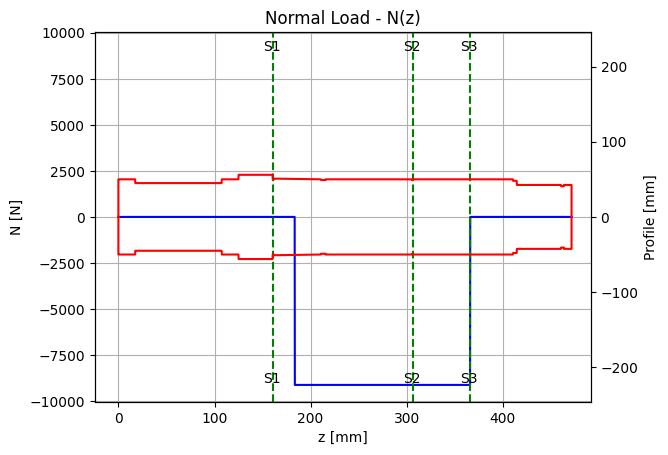

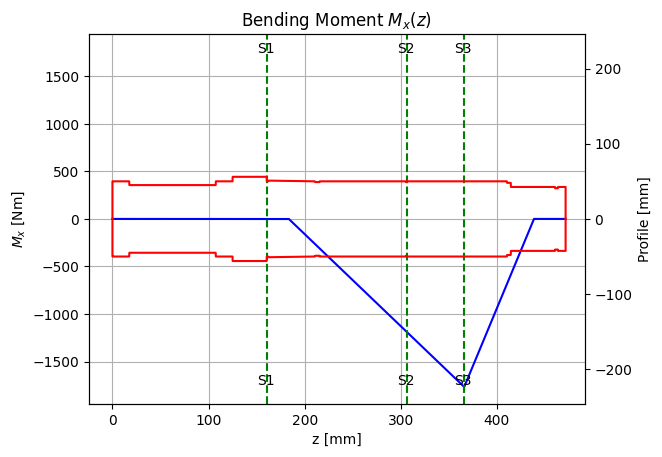

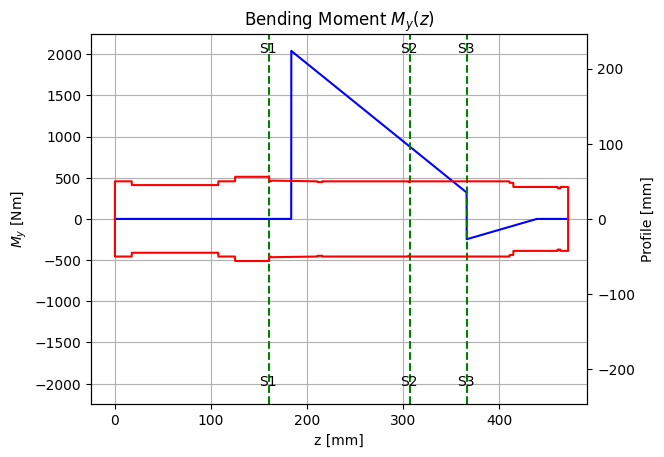

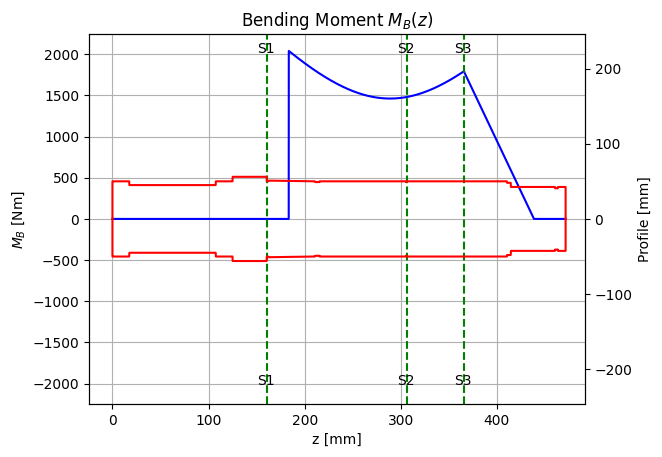

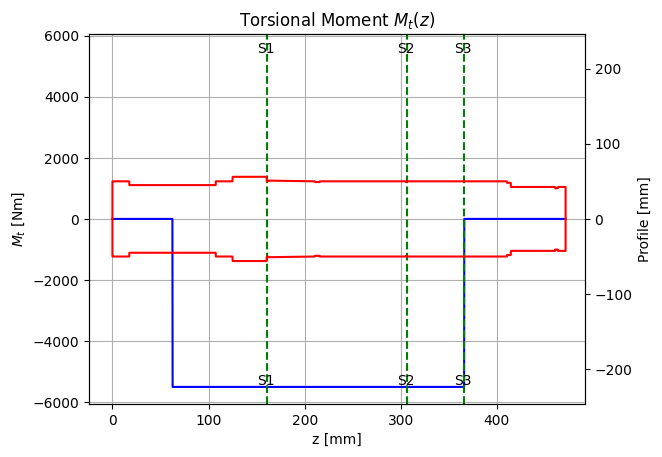

Calculating stresses on shaft A4 along profile 'A4 Static Profile'.


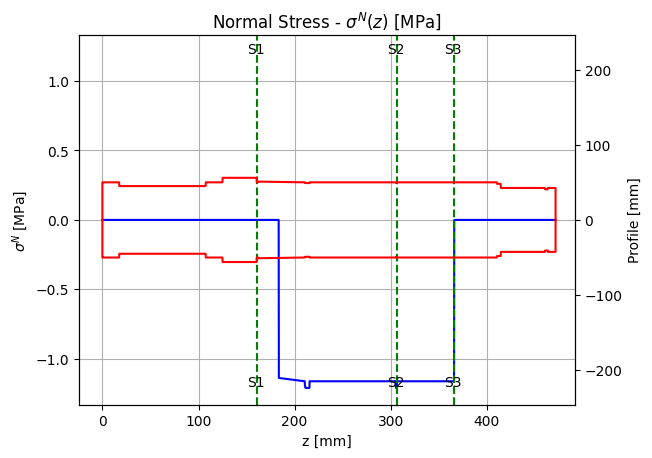

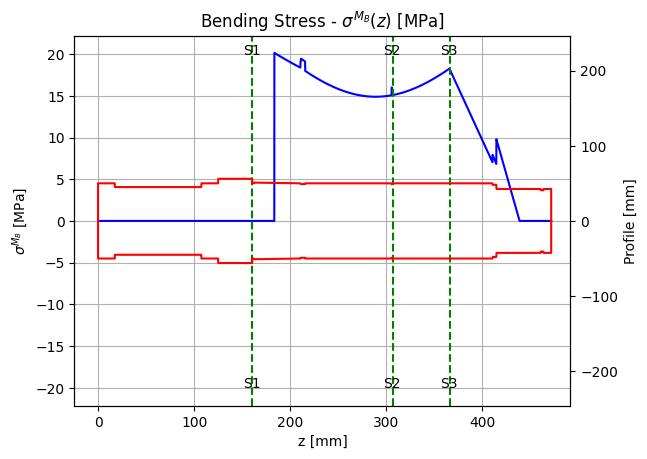

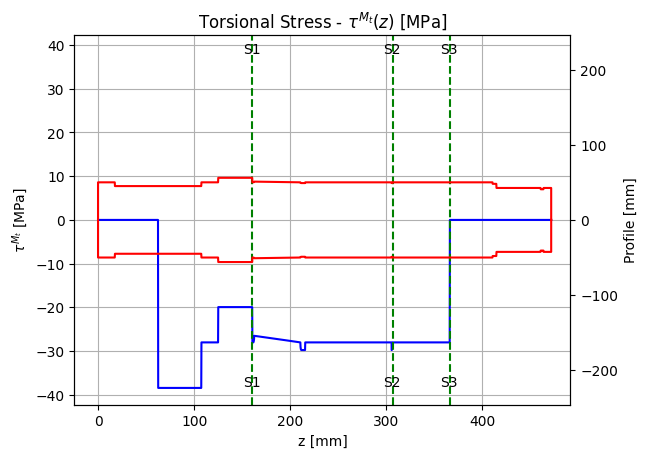

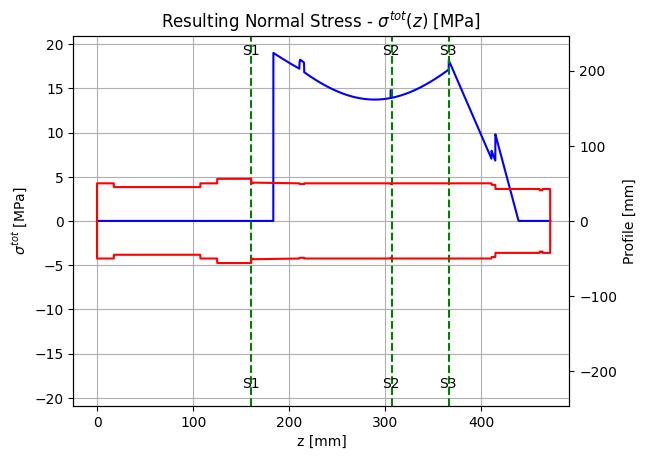

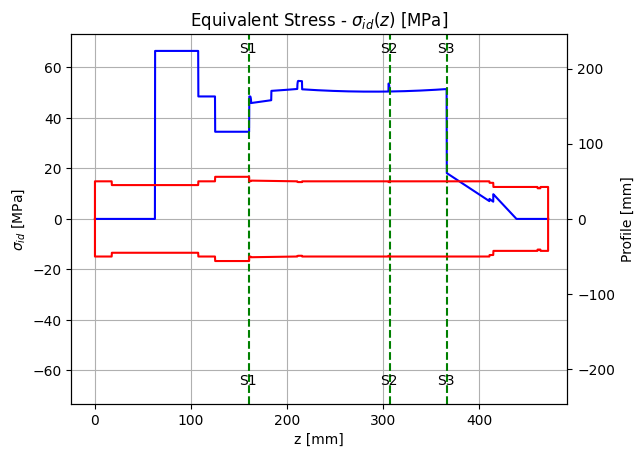

Calculating static safety factor for every user-defined section.
Section Name: Static Safety Factor
Section S1: 12.37 [-].
Section S2: 11.89 [-].
Section S3: 11.67 [-].


In [22]:
# Perform Static Verification on Shaft A4
A4.performStaticVerification(RF=referenceFrame, profile=A4.profiles[0])

In [23]:
# Shaft Fatigue Profile
fatigueProfile = pgt.ShaftProfile(name="A4 Fatigue Profile",
                                radii=np.array([100, 100, 112, 112, 100, 100, 98, 98, 100, 100, 96, 96, 85, 85, 81.5, 81.5, 85, 85])/2,
                                locs=np.array([0, 124.9, 125, 160.4, 160.5, 210.4, 210.5, 306.4, 306.5, 410.4, 410.5, 414.4, 414.5, 460.4, 460.5, 463.4, 463.5, 471.5]))
fatigueProfile.addFillet(radius=1, quadrant=[2], zOff=161.5, dOff=51)
fatigueProfile.addFillet(radius=1, quadrant=[1], zOff=211.5, dOff=50)
fatigueProfile.addFillet(radius=1, quadrant=[2], zOff=305.5, dOff=50)
fatigueProfile.addFillet(radius=0.25, quadrant=[1], zOff=460.75, dOff=41)
fatigue_refinedProfile = fatigueProfile.refineProfile(delta=0.1)
A4.addProfile(profile=fatigue_refinedProfile)

Initiating fatigue verification on shaft A4.
Internal loads for shaft A4 already calculated.


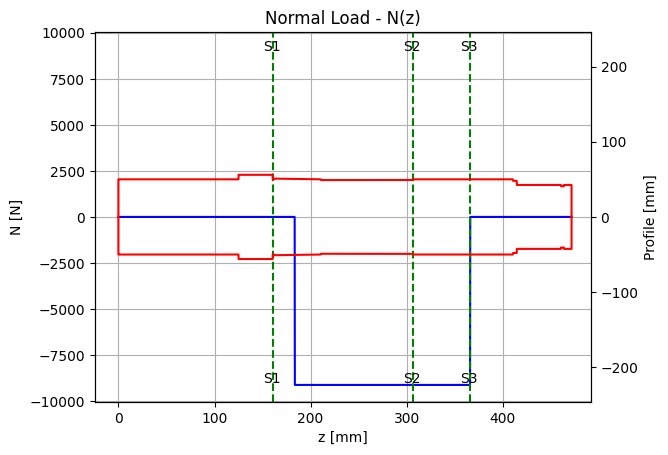

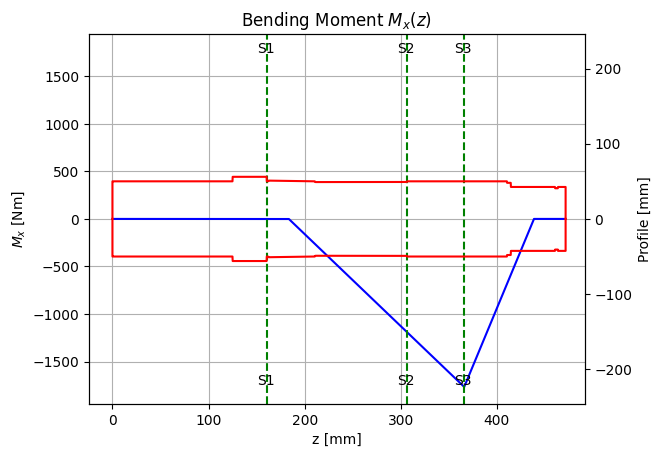

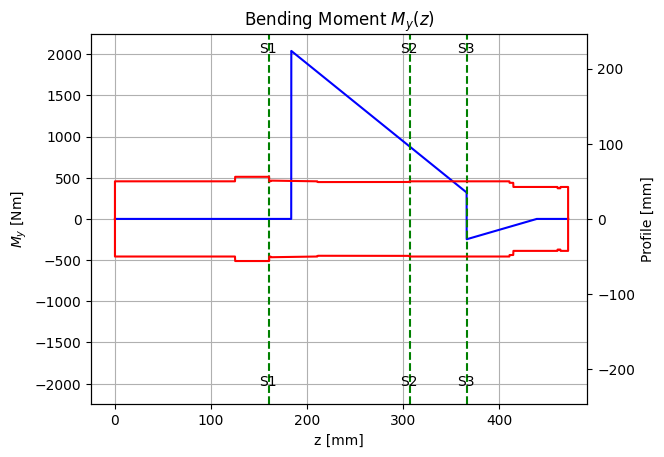

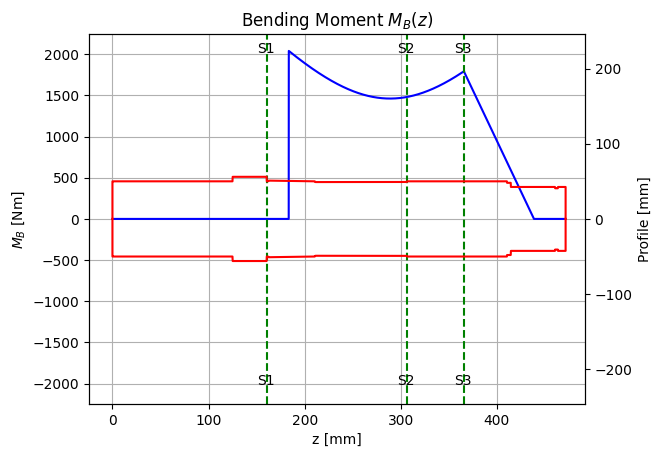

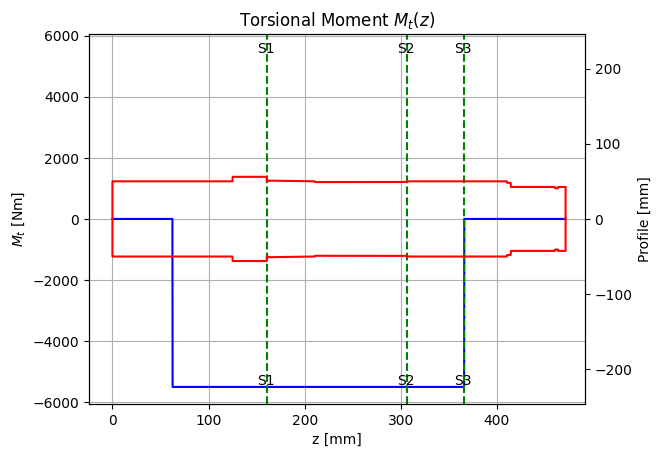

Calculating stresses on shaft A4 along profile 'A4 Fatigue Profile'.


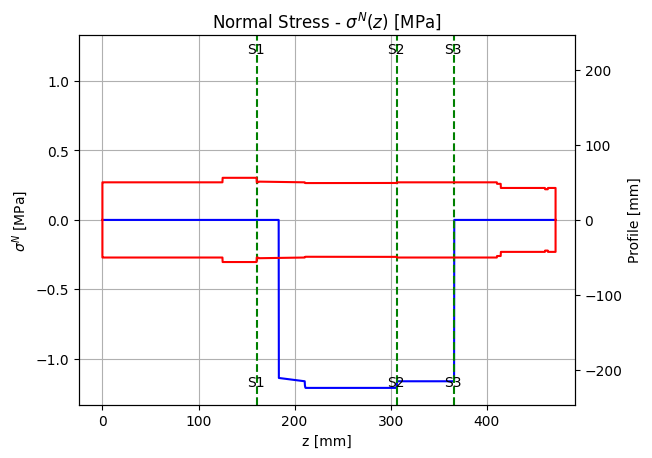

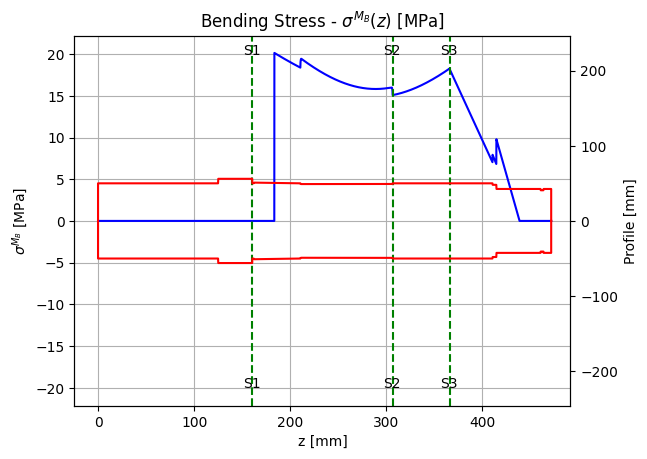

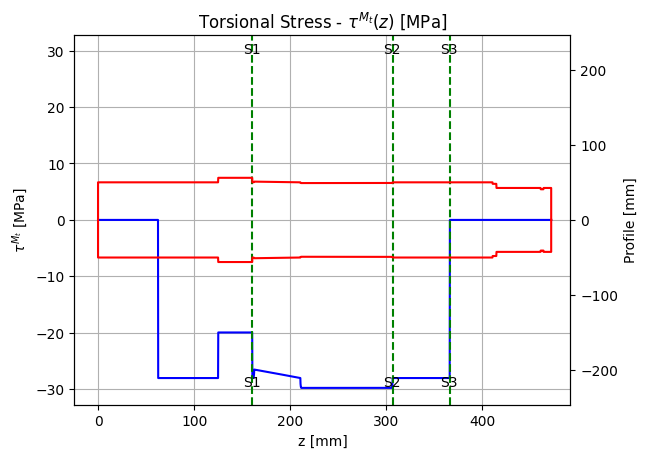

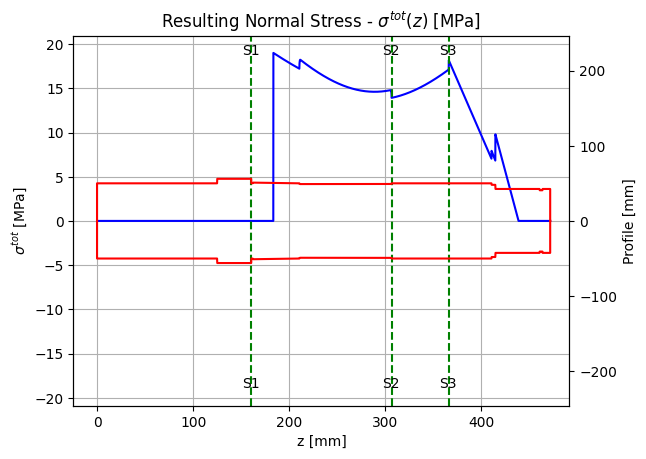

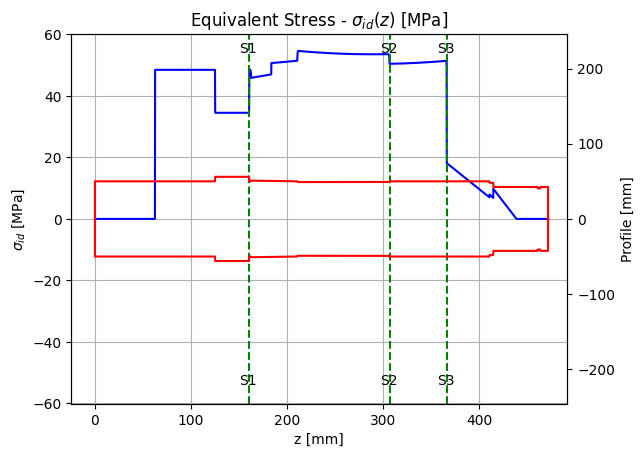

Calculating mean and alternating stresses for every user-defined section.
Calculating fatigue limit corrector factors on every user-defined section.
Calculating equivalent mean and alternating stresses along every user-defined section.


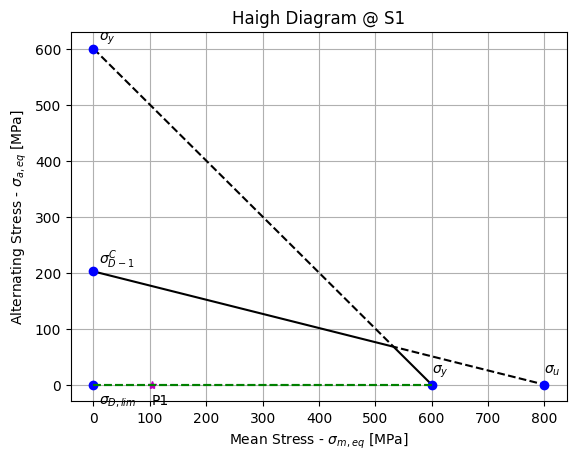

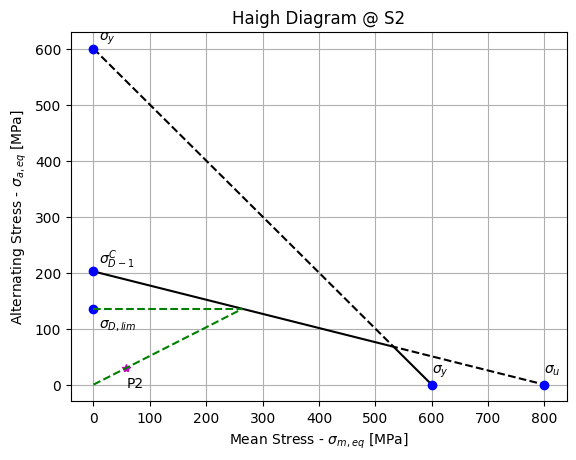

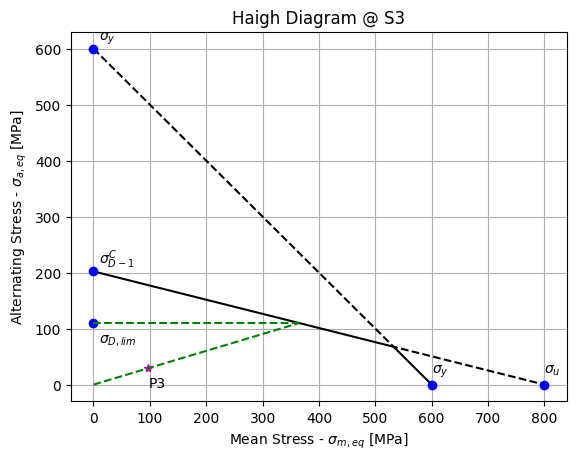

Calculating fatigue safety factor for every user-defined section.
Section Name: Fatigue Safety Factor
S1: -1.00 [-].
S2: 4.55 [-].
S3: 3.76 [-].


In [24]:
# Perform fatigue verification on shaft A4
A4.performFatigueVerification(RF=referenceFrame, profile=A4.profiles[1])

In [25]:
G6.analyseGearToothBending(mesh=M1, powerSource="Uniform", drivenMachine="Moderate shock", dShaft=100, Ce=1, 
                           teethCond="uncrowned teeth", lShaft=zA-zB, useCond="Commercial, enclosed units", sigma_FP=860, 
                           b_YN=1.3558, e_YN=-0.0178, N=1e7, temp=50, rel=0.99)

Initiating gear tooth bending analysis for gear G6.
Calculating maximum gear tooth bending stress for fatigue.
Maximum gear tooth bending stress for fatigue for gear G6: 156.66 [MPa].
Calculating bending safety factor for gear G6.
Gear tooth bending safety factor for gear G6: 5.59 [-].


In [26]:
G6.analyseGearToothPitting(mesh=M1, Z_R=1, sigma_HP=1896, b_ZN=1.4488, e_ZN=-0.023, N=1e7)

Initiating gear tooth pitting analysis for gear G6.
Calculating maximum gear contact stress.
Maximum gear contact stress for gear G6: 523.93 [MPa].
Calculating wear safety fator for gear G6.
Wear safety factor for gear G6: 3.62 [-].


In [27]:
# Oil of Choice
oil = pgt.Oil(name="ISO VG 220", temp=50, v1=140, v=150)

In [28]:
A.performLifeAnalysis(rel=90, condition="Typical contamination", a_skf=0.8, oil=oil)

Initiating Life Analysis on bearing A.
Checking minimum load condition.
Bearing A satisfies minimium load condition.
Calculating static safety factor.
Bearing A's equivalent static load: 24601.39 [N].
Bearing A's static safety factor: 8.13 [-].
Calculating reliability factor.
Bearing A's reliability factor: 1.00 [-].
Calculating equivalent dynamic load.
Bearing A's equivalent dynamic load: 24601.39 [N].
Calculating contamination factor based on given condition: 'Typical contamination'.
Bearing A's contamination factor: 0.30 [-].
Calculating bearing life.
Bearing A life analysis results: 728.46 [million cycles] | 211830.19 [hours].


In [29]:
B.performLifeAnalysis(rel=90, condition="Typical contamination", a_skf=10, oil=oil)

Initiating Life Analysis on bearing B.
Checking minimum load condition.
Bearing B satisfies minimium load condition.
Calculating static safety factor.
Bearing B's equivalent static load: 18555.06 [N].
Bearing B's static safety factor: 22.37 [-].
Calculating reliability factor.
Bearing B's reliability factor: 1.00 [-].
Calculating equivalent dynamic load.
Bearing B's equivalent dynamic load: 17070.65 [N].
Calculating contamination factor based on given condition: 'Typical contamination'.
Bearing B's contamination factor: 0.30 [-].
Calculating bearing life.
Bearing B life analysis results: 134939.38 [million cycles] | 39239516.21 [hours].
